In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from scipy.optimize import linear_sum_assignment

In [259]:
df = pd.read_csv('datasets/common_movies.csv', index_col=0)
df['averageRating_imdb'] = df['averageRating'] / 2
df['numVotes_imdb'] = df['numVotes']
df = df.drop(['averageRating', 'numVotes'], axis=1)
df.head()

,averageRating_netflix,numVotes_netflix,averageRating_imdb,numVotes_imdb
movieId,,,,
148,3.304947,22194,3.35,82586
471,4.071333,4500,4.25,155938
833,3.516949,8378,3.30,20414
1088,2.865306,245,3.85,1380
1238,3.392857,1932,3.35,7398


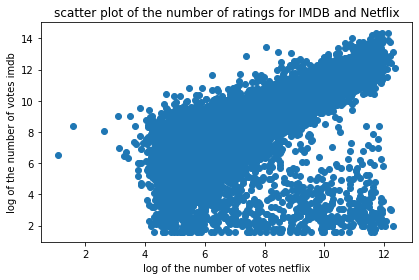

In [207]:
plt.scatter(np.log(df['numVotes_netflix']), np.log(df['numVotes_imdb']))
plt.xlabel('log of the number of votes netflix')
plt.ylabel('log of the number of votes imdb')

plt.title('scatter plot of the number of ratings for IMDB and Netflix')

plt.tight_layout()
plt.savefig('scatter_nb_votes.png')
plt.show()

1.592229756876917
1.8379165033325215


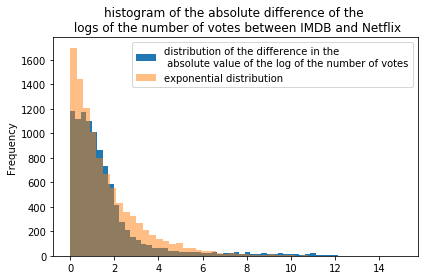

In [228]:
print(np.abs(np.log(df['numVotes_netflix']/df['numVotes_netflix'].max())-np.log(df['numVotes_imdb']/df['numVotes_imdb'].max())).mean())
print((np.abs(np.log(df['numVotes_netflix']/df['numVotes_netflix'].max())-np.log(df['numVotes_imdb']/df['numVotes_imdb'].max()))).std())
np.abs(np.log(df['numVotes_netflix']/df['numVotes_netflix'].max())-np.log(df['numVotes_imdb']/df['numVotes_imdb'].max())).plot.hist(bins=50, label='distribution of the difference in the \n absolute value of the log of the number of votes')
plt.hist(np.random.exponential(scale=1.6, size=10000), alpha=0.5, bins=50, label='exponential distribution')

plt.title('histogram of the absolute difference of the \n logs of the number of votes between IMDB and Netflix')
plt.legend()

plt.tight_layout()
plt.savefig('distributions_numvotes_expo.png')
plt.show()

1.3079645487479106
2.049986317772387


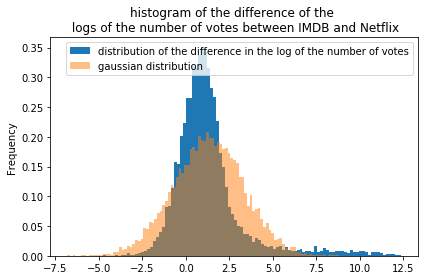

In [229]:
print((np.log(df['numVotes_netflix']/df['numVotes_netflix'].max())-np.log(df['numVotes_imdb']/df['numVotes_imdb'].max())).mean())
print((np.log(df['numVotes_netflix']/df['numVotes_netflix'].max())-np.log(df['numVotes_imdb']/df['numVotes_imdb'].max())).std())
(np.log(df['numVotes_netflix']/df['numVotes_netflix'].max())-np.log(df['numVotes_imdb']/df['numVotes_imdb'].max())).plot.hist(density=True, bins=100, label='distribution of the difference in the log of the number of votes')
plt.hist(np.random.normal(loc=1.3, scale=2, size=10000), bins=100, density=True, alpha=0.5, label='gaussian distribution')

plt.title('histogram of the difference of the \n logs of the number of votes between IMDB and Netflix')
plt.legend()

plt.tight_layout()
plt.savefig('distributions_numvotes_gaussian.png')
plt.show()

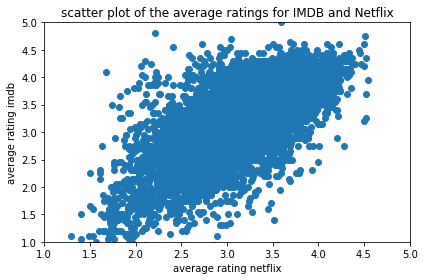

In [230]:
plt.scatter(df['averageRating_netflix'], df['averageRating_imdb'])
plt.xlim((1,5))
plt.ylim((1,5))
plt.xlabel('average rating netflix')
plt.ylabel('average rating imdb')
plt.title('scatter plot of the average ratings for IMDB and Netflix')

plt.tight_layout()
plt.savefig('scatter_avg_ratings.png')
plt.show()

0.32773591822300313
0.291844151454724


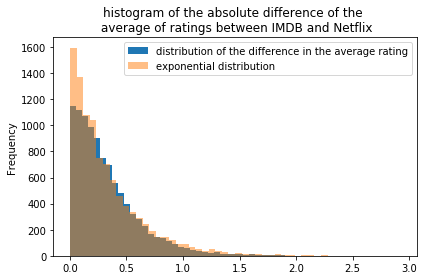

In [231]:
print((np.abs(df['averageRating_netflix']-df['averageRating_imdb'])).mean())
print((np.abs(df['averageRating_netflix']-df['averageRating_imdb'])).std())
np.abs(df['averageRating_netflix']-df['averageRating_imdb']).plot.hist(bins=50, label='distribution of the difference in the average rating')
plt.hist(np.random.exponential(scale=0.33, size=10000), alpha=0.5, bins=50, label='exponential distribution')

plt.title('histogram of the absolute difference of the \n average of ratings between IMDB and Netflix')
plt.legend()

plt.tight_layout()
plt.savefig('distributions_avgrating_expo.png')
plt.show()

-0.03946880897786337
0.43707739086938446


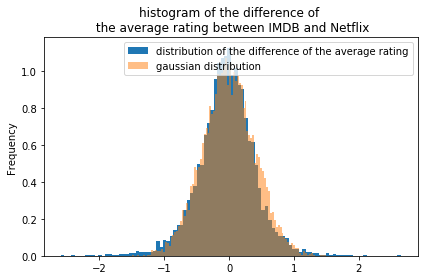

In [258]:
print((df['averageRating_netflix']-df['averageRating_imdb']).mean())
print((df['averageRating_netflix']-df['averageRating_imdb']).std())
(df['averageRating_netflix']-df['averageRating_imdb']).plot.hist(density=True, bins=100,
                                                                label='distribution of the difference of the average rating')
plt.hist(np.random.normal(loc=0, scale=0.4, size=10000), bins=100, density=True, alpha=0.5,
        label='gaussian distribution')

plt.title('histogram of the difference of \n the average rating between IMDB and Netflix')
plt.legend()

plt.tight_layout()
plt.savefig('distributions_avgrating_gaussian.png')
plt.show()

### bipartite matching

In [233]:
def exp_similarity(x,y):
    return 1-np.exp(-np.abs(x-y))

In [234]:
dis = scipy.spatial.distance.cdist(np.expand_dims(df.iloc[:30]['averageRating_netflix'].values, axis=-1), np.expand_dims(df.iloc[:30]['averageRating_imdb'].values, axis=-1), metric='cityblock')

In [250]:
idx1, idx2 = linear_sum_assignment(dis)
res = pd.DataFrame(np.concatenate((idx1[:,None], idx2[:,None]), axis=1), columns = ['movie netflix index', 'movie imdb index'])
print('accurate correspondance : {} over {}'.format((res['movie netflix index'] == res['movie imdb index']).sum(), len(res)))
res

accurate correspondance : 3 over 30


,movie netflix index,movie imdb index
0,0,4
1,1,1
2,2,18
3,3,16
4,4,20
5,5,25
6,6,24
7,7,2
8,8,3
9,9,28


In [254]:
dis = scipy.spatial.distance.cdist(np.expand_dims(df.iloc[:30]['averageRating_netflix'].values, axis=-1), np.expand_dims(df.iloc[:30]['averageRating_imdb'].values, axis=-1), metric=exp_similarity)

In [255]:
idx1, idx2 = linear_sum_assignment(dis)
res = pd.DataFrame(np.concatenate((idx1[:,None], idx2[:,None]), axis=1), columns = ['movie netflix index', 'movie imdb index'])
print('accurate correspondance : {} over {}'.format((res['movie netflix index'] == res['movie imdb index']).sum(), len(res)))
res

accurate correspondance : 3 over 30


,movie netflix index,movie imdb index
0,0,4
1,1,1
2,2,18
3,3,16
4,4,20
5,5,25
6,6,24
7,7,2
8,8,3
9,9,28


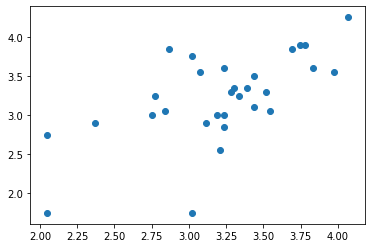

In [256]:
plt.scatter(df.iloc[:30]['averageRating_netflix'], df.iloc[:30]['averageRating_imdb'])